# Template 

- Author: Israel Oliveira [\[e-mail\]](mailto:'Israel%20Oliveira%20'<prof.israel@gmail.com>)

In [1]:
%load_ext watermark

In [2]:
import pandas as pd
import seaborn as sns
from collections import Counter

In [3]:
# Run this cell before close.
%watermark
%watermark --iversion
%watermark -b -r -g

2020-06-18T10:54:50+00:00

CPython 3.7.7
IPython 7.15.0

compiler   : GCC 8.3.0
system     : Linux
release    : 4.19.76-linuxkit
machine    : x86_64
processor  : 
CPU cores  : 16
interpreter: 64bit
seaborn 0.10.1
pandas  1.0.4

Git hash: b4348e2f24cd733e3f1939d40228356aa358edf2
Git repo: https://github.com/ysraell/aceleradev_private.git
Git branch: master


In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 1000)

In [5]:
!ls ../data/
path_data = '../data/'

__MACOSX		  estaticos_portfolio1.csv  features_dictionary.pdf
estaticos_market.csv	  estaticos_portfolio2.csv
estaticos_market.csv.zip  estaticos_portfolio3.csv


# estaticos_market.csv

In [6]:
df_marked = pd.read_csv(path_data+'estaticos_market.csv')

Conferindo o nome das colunas:

In [7]:
[x for x in df_marked.columns]

['Unnamed: 0',
 'id',
 'fl_matriz',
 'de_natureza_juridica',
 'sg_uf',
 'natureza_juridica_macro',
 'de_ramo',
 'setor',
 'idade_empresa_anos',
 'idade_emp_cat',
 'fl_me',
 'fl_sa',
 'fl_epp',
 'fl_mei',
 'fl_ltda',
 'dt_situacao',
 'fl_st_especial',
 'fl_email',
 'fl_telefone',
 'fl_rm',
 'nm_divisao',
 'nm_segmento',
 'fl_spa',
 'fl_antt',
 'fl_veiculo',
 'vl_total_tancagem',
 'vl_total_veiculos_antt',
 'vl_total_veiculos_leves',
 'vl_total_veiculos_pesados',
 'fl_optante_simples',
 'qt_art',
 'vl_total_veiculos_pesados_grupo',
 'vl_total_veiculos_leves_grupo',
 'vl_total_tancagem_grupo',
 'vl_total_veiculos_antt_grupo',
 'vl_potenc_cons_oleo_gas',
 'fl_optante_simei',
 'sg_uf_matriz',
 'de_saude_tributaria',
 'de_saude_rescencia',
 'nu_meses_rescencia',
 'de_nivel_atividade',
 'de_indicador_telefone',
 'fl_simples_irregular',
 'vl_frota',
 'empsetorcensitariofaixarendapopulacao',
 'nm_meso_regiao',
 'nm_micro_regiao',
 'fl_passivel_iss',
 'qt_socios',
 'qt_socios_pf',
 'qt_socios_pj

In [8]:
df_marked[df_marked.columns[0]]

0              0
1              1
2              2
3              3
4              4
           ...  
462293    462293
462294    462294
462295    462295
462296    462296
462297    462297
Name: Unnamed: 0, Length: 462298, dtype: int64

In [9]:
df_marked = df_marked.drop(columns=[df_marked.columns[0]])

Qual coluna deve ser a chave primária? `id`? Melhor conferir.

In [10]:
df_marked.index.stop

462298

In [11]:
df_marked
unique_cols = []
for col in df_marked.columns:
    if df_marked[col].nunique() > (df_marked.index.stop -1):
        unique_cols.append(col)

In [12]:
unique_cols

['id']

Nunca se sabe.

# estaticos_portfolio*.csv

In [13]:
path_data+'estaticos_portfolio{}.csv'.format('*')

'../data/estaticos_portfolio*.csv'

In [14]:
!ls ../data/estaticos_portfolio*.csv

../data/estaticos_portfolio1.csv  ../data/estaticos_portfolio3.csv
../data/estaticos_portfolio2.csv


In [15]:
!head ../data/estaticos_portfolio3.csv

,id
0,bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe24b56a3e11f7d6a0bce
1,16843c9ffb920170477118933798510d8d5f00f5c56c1221773356355bded321
2,1b8d092daff12bed8b3c2ab93bf5df2921865a68aca185f51e31e7105abb0c48
3,3aafa3a1f12f483740a52956af100223333d0e3c79bf2ce341896dd554e72293
4,c60431fbca90067f105570e1e8a684bcd7048205bbf6c40d71c3d558626f2344
5,5de08033561948a226f8ba8f8668a4ff4123be8ea7114dce5d7c0d74f61837bf
6,194e619cb6417f92f75653406cf04106debc5035f13a8850b00428fd34d91d72
7,cc734f72fdd8753ba2e7638f3d09e0597fd859735904dafab03cec6b347b331d
8,7e46107cb32e64f7f90ec16372d29f205f0d9781140308267f8c5d07b65a22fe


In [16]:
df_ep_list = [pd.read_csv(path_data+'estaticos_portfolio{}.csv'.format(i+1)) for i in range(3)]

In [17]:
ids = set(df_marked.id.tolist())
idsp = set()
for i in range(3):
    idsp |= set(df_ep_list[i].id.tolist())

In [18]:
idsp - ids

set()

Todos os ids nos portifólios estão no dataset de treino.

In [19]:
tmp = []
for i in range(3):
    df_ep_list[i]['P'] = i+1 
    tmp.append(df_ep_list[i][['id','P']])

In [20]:
df_ep = pd.concat(tmp)

In [21]:
df_ep

,id,P
0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...,1
1,32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...,1
2,a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...,1
3,6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...,1
4,f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...,1
...,...,...
260,b6966d868fb7976f993aca02fb667c9ae8f5ebf4d2e033...,3
261,4a87a82771996c18afc68a17d139bd318d08fa3e5dcf9f...,3
262,f3b468c4066fac0d2de28bdafa87ec8b9d103a085cf7de...,3
263,98448fefe3e358578fa643b63fcdcf4a3f2dcb496863f8...,3


In [22]:
df_marked['P'] = 0

In [23]:
idstoP = {ID: P for ID,P in zip(df_marked['id'],df_marked['P'])}
idstoP.update({ID: P for ID,P in zip(df_ep['id'],df_ep['P'])})

In [24]:
sum(df_marked['id'].apply(lambda x: idstoP[x]) > 0)

1278

In [25]:
df_marked['P'] = df_marked['id'].apply(lambda x: idstoP[x])

In [26]:
df_port = df_marked.loc[df_marked['P'] > 0].reset_index(drop=True).copy()

In [27]:
df_port.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,...,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,P
0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,COMERCIO VAREJISTA,COMERCIO,0.646575,<= 1,False,False,False,True,False,2018-03-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1,32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...,False,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,6.586301,5 a 10,False,False,False,False,False,2012-03-29,...,6.0,22.427778,47.633333,3.966667,NaN,NaN,NaN,0.0,0.0,2.0,NaN,-100.000000,0.0,4,1
2,09e95c1a84049001d086470a8f320a19b076f955a89122...,True,AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL,AC,ADMINISTRACAO PUBLICA,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,11.243836,10 a 15,False,False,False,False,False,2007-08-03,...,1812.0,84.967827,357.066667,-6.500000,99.961009,357.066667,25.533333,1361.0,1361.0,1383.0,0.0,-1.590745,0.0,0,2
3,a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...,True,EMPRESARIO INDIVIDUAL,MA,OUTROS,COMERCIO VAREJISTA,COMERCIO,8.010959,5 a 10,False,False,False,True,False,2010-10-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
4,6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,COMERCIO VAREJISTA,COMERCIO,20.863014,> 20,False,False,False,False,False,2005-11-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1


#### Avaliando as colunas e valores.

In [28]:
nInf = float('-Inf')

In [29]:
for col in df_port.columns:
    if df_port[col].dtypes == 'O':
        df_port[col] = df_port[col].fillna('').apply(lambda x: str(x))
    if df_port[col].dtypes == 'float64':
        df_port[col] = df_port[col].fillna(nInf).apply(lambda x: float(x))

In [30]:
set(df_port.dtypes.to_list())

{dtype('bool'), dtype('int64'), dtype('float64'), dtype('O')}

Top valores por portifólio/coluna

In [31]:
Counters = {}
for p in range(1,3+1):
    Counters[p] = {}
    df_tmp = df_port.loc[df_port['P'] == p]
    for col in df_tmp.columns:
        if all([col != 'P', col != 'id']):
            Counters[p][col] = dict(Counter(df_tmp[col].tolist()))

In [32]:
data_list = []
for p in Counters.keys():
    for col in Counters[p].keys():
        for val in Counters[p][col].keys():
            data_list.append([p, col, val, Counters[p][col][val]])

In [33]:
df_data = pd.DataFrame(data_list, columns=['P','col','val','Count'])

In [34]:
df_ref = df_data.loc[(df_data.val != nInf) & (df_data.val != '')].drop_duplicates().dropna().reset_index(drop=True)

In [35]:
df_ref.sort_values(by='Count', ascending=False).P.unique()

array([1, 2, 3])

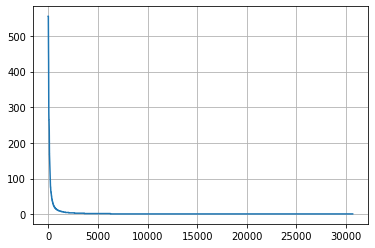

In [36]:
df_ref.sort_values(by='Count', ascending=False).reset_index(drop=True)['Count'].plot(grid=True)

In [37]:
df_ref.sort_values(by='Count', ascending=False).reset_index(drop=True)

,P,col,val,Count
0,1,fl_simples_irregular,False,555
1,1,fl_spa,False,555
2,1,fl_ltda,False,555
3,1,fl_st_especial,False,555
4,1,fl_epp,False,555
...,...,...,...,...
30667,2,faturamento_est_coligados_gp,2.11806e+07,1
30668,2,faturamento_est_coligados_gp,3.88e+06,1
30669,2,faturamento_est_coligados_gp,329702,1
30670,2,faturamento_est_coligados_gp,2.68001e+07,1


In [38]:
def top_per_col(i,topn):
    return df_ref.loc[df_ref['P'] == i].sort_values(by='Count', ascending=False).reset_index(drop=True).head(topn)

In [39]:
len(df_ref)

30672

In [40]:
sum(top_per_col(1,3000).Count > 1)

999

In [41]:
sum(top_per_col(2,8000).Count > 1)

3383

In [42]:
sum(top_per_col(3,8000).Count > 1)

1880

In [43]:
def top_vals(i,min_count = 2):
    return df_ref.loc[(df_ref['P'] == i) & (df_ref['Count'] >= min_count)].sort_values(by='Count', ascending=False).reset_index(drop=True)

In [44]:
min_count = 400
set_cols = set(top_vals(1,min_count).col.tolist()+top_vals(2,min_count).col.tolist()+top_vals(3,min_count).col.tolist())

In [45]:
len(set_cols)

27

In [46]:
len(df_marked.columns)

182

In [47]:
Max_Feat = 10

In [48]:
for min_count in range(300,1000):
    set_cols = set(top_vals(1,min_count).col.tolist()+top_vals(2,min_count).col.tolist()+top_vals(3,min_count).col.tolist())
    if len(set_cols) <= Max_Feat:
        break

In [49]:
len(set_cols)

10

In [50]:
min_count

518

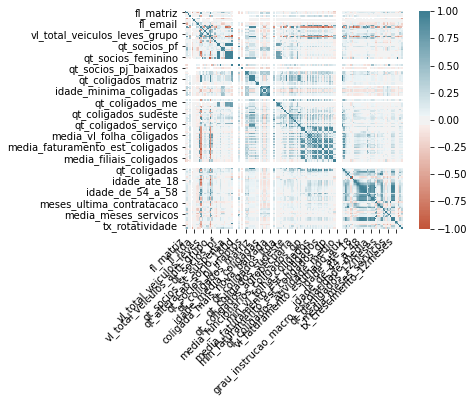

In [51]:
corr = df_port.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [52]:
set_cols_corr = set(list(corr['P'].apply(lambda x: abs(x)).sort_values(ascending=False).head(Max_Feat +1).index))-set('P')

In [53]:
len(set_cols_corr & set_cols)

0

As top colunas segundo o método da contagem parecem não serem as mesmas pelo cálculo de correleção.

In [54]:
set_cols_corr

{'fl_mei',
 'idade_empresa_anos',
 'idade_maxima_socios',
 'idade_media_socios',
 'max_meses_servicos_all',
 'media_meses_servicos',
 'media_meses_servicos_all',
 'qt_coligados_serviço',
 'vl_faturamento_estimado_aux',
 'vl_idade_maxima_socios_pj'}

In [55]:
set_cols

{'fl_antt',
 'fl_epp',
 'fl_ltda',
 'fl_matriz',
 'fl_me',
 'fl_sa',
 'fl_simples_irregular',
 'fl_spa',
 'fl_st_especial',
 'vl_total_veiculos_pesados_grupo'}

In [56]:
pd.DataFrame(data=list(set_cols_corr | set_cols)+['id'], columns=['cols']).to_csv('top_cols.csv', index=False)

In [57]:
corr['P'].all()

True

In [58]:
print(pd.DataFrame(data=list(set_cols_corr | set_cols)+['id'], columns=['cols']))

                               cols
0              fl_simples_irregular
1                idade_empresa_anos
2                           fl_antt
3               idade_maxima_socios
4                idade_media_socios
5          media_meses_servicos_all
6       vl_faturamento_estimado_aux
7                           fl_ltda
8            max_meses_servicos_all
9         vl_idade_maxima_socios_pj
10                            fl_me
11                           fl_spa
12             qt_coligados_serviço
13                        fl_matriz
14             media_meses_servicos
15                            fl_sa
16                   fl_st_especial
17  vl_total_veiculos_pesados_grupo
18                           fl_mei
19                           fl_epp
20                               id
